<a href="https://colab.research.google.com/github/pwy7fv/the_bootstrap/blob/main/assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [ ]:
! git clone https://www.github.com/pwy7fv/the_bootstrap

fatal: destination path 'the_bootstrap' already exists and is not an empty directory.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Q1.**

1. Imagine rolling two dice, 𝑑1 and 𝑑2. Let 𝑅𝑚𝑖𝑛 be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of 𝑅𝑚𝑖𝑛? Plot the probability and cumulative distribution functions for 𝑅𝑚𝑖𝑛. Compute this by hand and simulate it using the law of large numbers.

In [ ]:
pdf = np.zeros(6)
faces = np.array([1,2,3,4,5,6])

for d1 in range(6):
    for d2 in range(6):
        min_ds = np.min([faces[d1], faces[d2]])
        pdf[min_ds - 1] += 1

pdf = pdf / np.sum(pdf)
cdf = np.cumsum(pdf)


In [ ]:
faces = np.array([1,2,3,4,5,6])
N = 150
die1 = np.random.choice(faces, size=N)
die2 = np.random.choice(faces, size=N)
roll = [min([die1[i],+die2[i]]) for i in range(N)]
ecdf = np.zeros(6)

for i in range(6):
    ecdf[i] = (1/N)*np.sum( roll <= faces[i] )

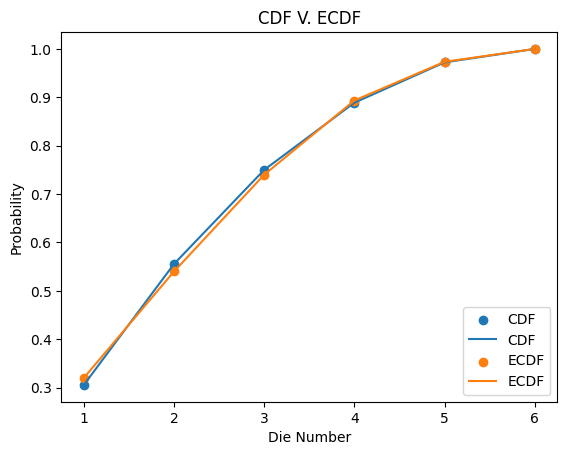

In [ ]:

plt.scatter(faces,cdf,label='CDF')
plt.plot(faces,cdf,label='CDF')
plt.scatter(faces,ecdf,label='ECDF')
plt.plot(faces,ecdf,label='ECDF')
plt.title('CDF V. ECDF')
plt.xlabel("Die Number")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.show()

2. Imagine rolling three dice, 𝑑1, 𝑑2, and 𝑑3. Let 𝑅𝑚𝑒𝑑 be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of 𝑅𝑚𝑒𝑑? Plot the probability and cumulative distribution functions for 𝑅𝑚𝑒𝑑. I recommend using simulations and the law of large numbers.

In [ ]:
faces = np.array([1,2,3,4,5,6])
N = 150
die1 = np.random.choice(faces, size=N)
die2 = np.random.choice(faces, size=N)
die3 = np.random.choice(faces, size=N)

rolls = np.array([die1, die2, die3])
med_roll = np.median(rolls, axis=0).astype(int)
average = np.sum(med_roll)/N


In [ ]:
ecdf = np.zeros(6)
single = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( med_roll <= faces[i] )
    single[i] = (1/N)*np.sum( die1 <= faces[i] )

    average = np.sum(med_roll)/N


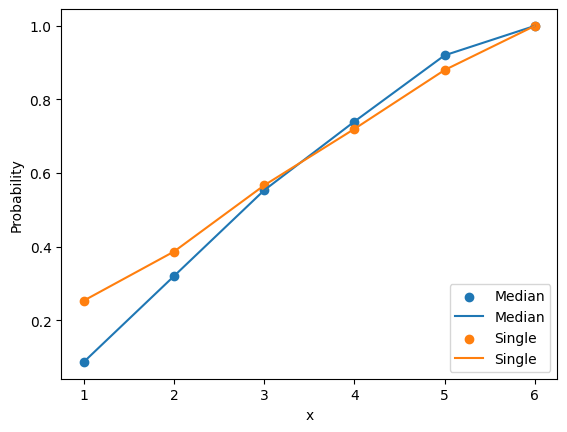

In [ ]:
plt.scatter(faces,ecdf,label='Median')
plt.plot(faces,ecdf,label='Median')
plt.scatter(faces,single,label='Single')
plt.plot(faces,single,label='Single')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.show()

3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

In [ ]:
faces = np.array([1,2,3,4,5,6])
N = 2000
results = []
for i in range(N):
    total = 0
    while True:
        roll = np.random.choice(faces)
        total += roll
        if roll < 6:
          break
    results.append(total)






In [ ]:
totals = np.array(total)
expected_value = np.mean(totals)

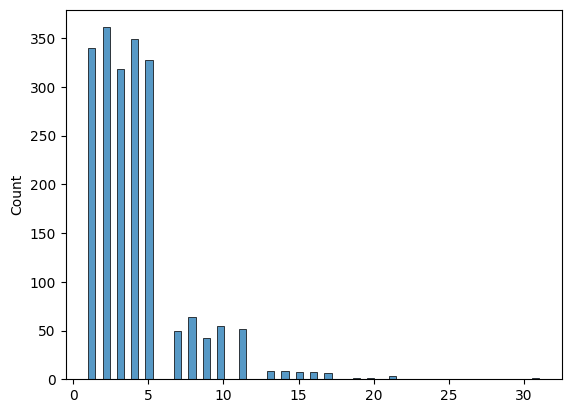

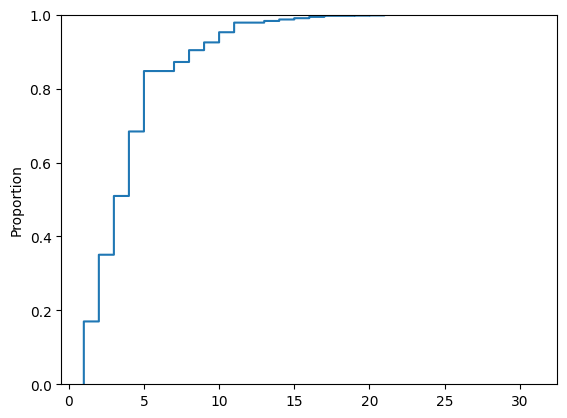

In [ ]:
sns.histplot(results)
plt.show()

sns.ecdfplot(results)
plt.show()

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [24]:
df = pd.read_csv('the_bootstrap/data/mammogram.csv')

In [27]:
df.head()

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


1. Cross tabulate treatment and breast_cancer_death. What is the difference in 25-year survival rates between the control and mammogram groups?

In [26]:
pd.crosstab(df['treatment'],df['breast_cancer_death'])

breast_cancer_death,no,yes
treatment,,
control,44405,505
mammogram,44425,500


In [31]:
difference = ((44425 / (44425 + 500)) - (44405 / (44405 + 505)))
print(difference)

0.00011505110015985753


Bootstrap the densities and distributions of survival rates for the two groups.

In [41]:
df['survived'] = 0
df.loc[ df['breast_cancer_death']=='no','survived'] = 1

df_c = df.loc[ df['treatment'] =='control', : ]
df_t = df.loc[ df['treatment'] =='mammogram', : ]

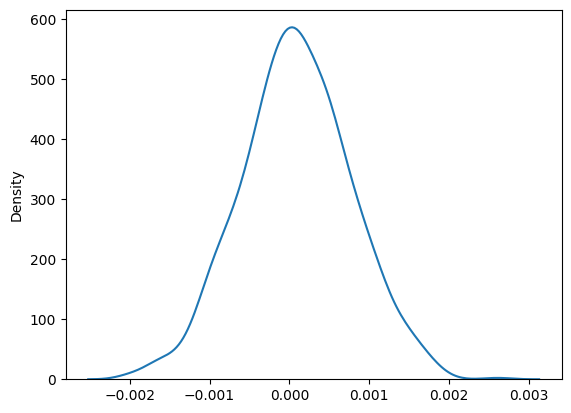

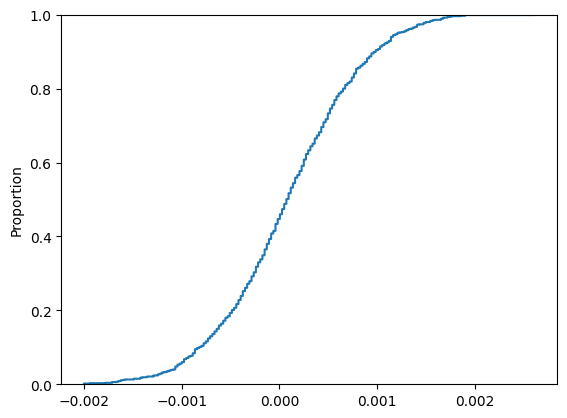

In [46]:
S = 1000
fx = []
for t in range(S):
    df_treat = df_t.sample( df_t.shape[0], axis=0, replace=True)
    df_control = df_c.sample( df_c.shape[0], axis=0, replace=True)
    treatment_effect_t = np.mean(df_treat['survived']) - np.mean(df_control['survived'])
    fx.append(treatment_effect_t)


sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()

Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero? We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?


In [58]:
CI = np.quantile(fx,[.05,.95])
print( 'CI: ' + str(CI) )

CI: [-0.00104265  0.00120595]


It does include zero, showing that their might not be much of a difference between getting a mammogram or not. I think this data might understate the importance of getting mammograms due to the fact that even if you are checked for one does not mean it was soon enough and the cancer might be at an aggresive stage already. It would have been better if it was broken down by age, how frequently one gets a mammogram, or how many mammogram someone has had.